# Fake news detection using the Machine Learing methods: Logistic Regression, Decision Tree Classifier, Gradient Boosting Classifier and Random Forest Classifier

## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import string

## Import csv files using Pandas DataFrame

In [2]:
fake_data =pd.read_csv("data/Fake.csv")
true_data = pd.read_csv("data/True.csv")


## Show the DataFrames

In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Labeled fake data and true data as 0/False and 1/True

In [4]:
fake_data["class"] = 0
true_data['class'] = 1

## Show the dataframes shapes

In [5]:
fake_data.shape, true_data.shape 

((23481, 5), (21417, 5))

## Divide the dataframes into training and testing sets

In [6]:
fake_data_test = fake_data.tail(10)
fake_data.drop(fake_data.tail(10).index, axis=0, inplace=True)
true_data_test = true_data.tail(10)
true_data.drop(true_data.tail(10).index, axis=0, inplace=True)


## Shows the dataframes shapes after dropping 10 rows for testing

In [7]:
fake_data.shape, true_data.shape

((23471, 5), (21407, 5))

In [8]:
fake_data_test.shape, true_data_test.shape

((10, 5), (10, 5))

In [9]:
fake_data_test.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


## Merge two data frames with axis rows/0

In [10]:
data_merge = pd.concat([fake_data, true_data], axis=0)
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Shows the columns names

In [11]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [12]:
# drop the columns and get only text and class
data = data_merge.drop(['title','subject','date'], axis='columns')

## Check if there are null values or not

In [13]:
data.isnull().sum()

text     0
class    0
dtype: int64

## Sample as random 

In [14]:
data = data.sample(frac=1)

In [15]:
data.head()

,text,class
23238,Shawn Helton 21st Century WireFollowing the in...,0
18920,https://www.youtube.com/watch?v=DRLVvYzG46w,0
19072,WASHINGTON (Reuters) - The North Korean foreig...,1
11102,WASHINGTON (Reuters) - U.S. President Barack O...,1
20245,At least they re consistent and crooked to the...,0


In [16]:
# reset the index value from 0.1.2....
data.reset_index(inplace=True)

In [17]:
data.head()

,index,text,class
0,23238,Shawn Helton 21st Century WireFollowing the in...,0
1,18920,https://www.youtube.com/watch?v=DRLVvYzG46w,0
2,19072,WASHINGTON (Reuters) - The North Korean foreig...,1
3,11102,WASHINGTON (Reuters) - U.S. President Barack O...,1
4,20245,At least they re consistent and crooked to the...,0


In [18]:
# drop the unnessary columns 
data.drop(['index'], axis=1, inplace=True)
data.head()

,text,class
0,Shawn Helton 21st Century WireFollowing the in...,0
1,https://www.youtube.com/watch?v=DRLVvYzG46w,0
2,WASHINGTON (Reuters) - The North Korean foreig...,1
3,WASHINGTON (Reuters) - U.S. President Barack O...,1
4,At least they re consistent and crooked to the...,0


In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:

def wordopt(text):
    """clean the text and retun the cleaned text"""
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [21]:
#apply wordopt function in data['text']
data['text']= data['text'].apply(wordopt)

In [22]:
data['text'][0]

'shawn helton  century wirefollowing the invasion of iraq in   the pentagon reportedly paid pr firm bell pottinger   million to produce fake terror videos used to steer western political interests if this latest report by the the bureau of investigative journalism is accurate  the public is once again privy to another startling example of how deep state social engineering impacts and propels larger geopolitical war campaigning this latest pentagon public relations scandal comes after an onslaught of summertime war propaganda images were found to have been fabricated by the george soros and us uk government backed pseudo ngo known as the white helmets    war games     photo illustration  s shawn helton as  recently reported   like so many celebrated attributes of the lauded white helmets  the rescue numbers are clearly exaggerated  the so called rebel held  territories  in actuality  terrorist held areas  in which the white helmets exclusively operate  have very few civilians remaining 

In [23]:
x = data['text']
y = data['class']

## Split text into trains and test sets 75/25

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [25]:
# TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. 
# This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.
from sklearn.feature_extraction.text import TfidfVectorizer
# instantiate the vectorizer object
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
# loading the model sklearn linear model
LR = LogisticRegression()
# fit the model using vectorize xv_train, y_train 
LR.fit(xv_train, y_train)


LogisticRegression()

In [27]:
# predict the model using xv_test
pred_lr = LR.predict(xv_test)


In [28]:
# Accuracy score
LR.score(xv_test, y_test)

0.9844919786096257

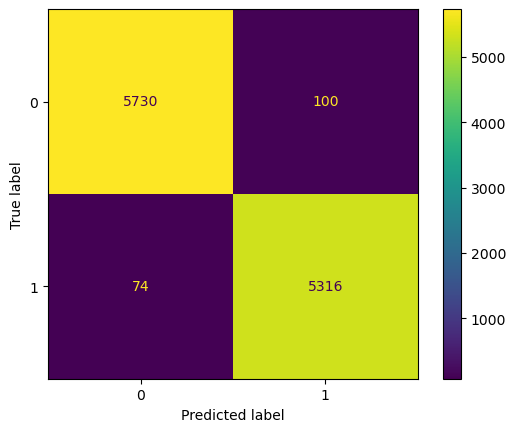

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5830
           1       0.98      0.99      0.98      5390

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [29]:
cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, pred_lr))

## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [49]:
# accuracy score on the training data
pred_dt = DT.predict(xv_test)
test_data_accuracy = accuracy_score(pred_dt, y_test)
print('Accuracy score of the training data : ', test_data_accuracy)

Accuracy score of the training data :  0.996524064171123


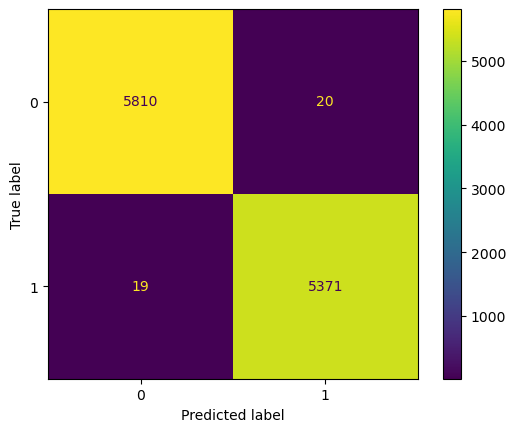

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5830
           1       1.00      1.00      1.00      5390

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [33]:
cm = confusion_matrix(y_test, pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, pred_dt))

## Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
pred_gb = GB.predict(xv_test)

In [36]:
GB.score(xv_test, y_test)

0.9952762923351158

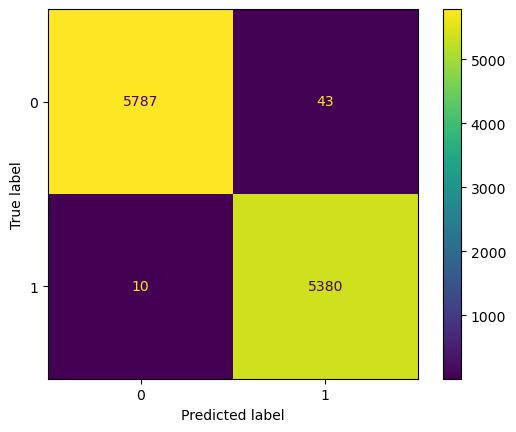

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5830
           1       0.99      1.00      1.00      5390

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [37]:
cm = confusion_matrix(y_test, pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, pred_gb))

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
pred_rf = GB.predict(xv_test)

In [40]:
RF.score(xv_test, y_test)

0.9877005347593583

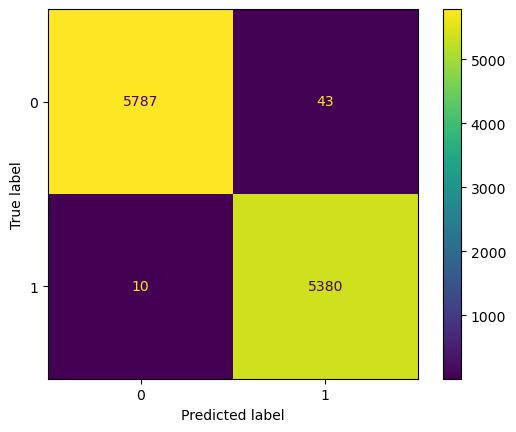

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5830
           1       0.99      1.00      1.00      5390

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [41]:
cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, pred_rf))

## Manual Testing

In [42]:
def output_label(n):
    """check the lebel"""
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    else:
        return "Not define"
    
def manual_testing(news):#
    """testing the given Text using differt trained Models"""
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {}  \nRFC Prediction: {}".format(output_label(pred_LR[0]),
                                                                                                               output_label(pred_DT[0]),
                                                                                                               output_label(pred_GB[0]),
                                                                                                               output_label(pred_RF[0])))

## Test the prediction 

In [43]:
#news = str(input())
#manual_testing(news)

In [44]:
# read the testing data and show 
test = pd.read_csv("data/manual_testing.csv")
test.head()

,Unnamed: 0,title,text,subject,date,class
0,23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
1,23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
2,23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
3,23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
4,23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [45]:
# drop the columns
test_new = test.drop(["Unnamed: 0","title","subject","date"], axis=1)
test_new.head()

,text,class
0,"21st Century Wire says This week, the historic...",0
1,By Dady Chery and Gilbert MercierAll writers ...,0
2,Vic Bishop Waking TimesOur reality is carefull...,0
3,Paul Craig RobertsIn the last years of the 20t...,0
4,Robert Fantina CounterpunchAlthough the United...,0


In [46]:
def testings_news(data):
    """testing the given Text using differt trained Models"""

    testing_news = data["text"]
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    

    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    data["pred_LR"] = pred_LR
    data["pred_DT"] = pred_DT
    data["pred_GB"] = pred_GB
    data["pred_RF"] = pred_RF
    return data
        
        

In [47]:
testings_news(test_new)

,text,class,pred_LR,pred_DT,pred_GB,pred_RF
0,"21st Century Wire says This week, the historic...",0,0,0,0,0
1,By Dady Chery and Gilbert MercierAll writers ...,0,0,0,0,0
2,Vic Bishop Waking TimesOur reality is carefull...,0,0,0,0,0
3,Paul Craig RobertsIn the last years of the 20t...,0,0,0,0,0
4,Robert Fantina CounterpunchAlthough the United...,0,0,0,0,0
5,21st Century Wire says As 21WIRE reported earl...,0,0,0,0,0
6,21st Century Wire says It s a familiar theme. ...,0,0,0,0,0
7,Patrick Henningsen 21st Century WireRemember ...,0,0,0,0,0
8,21st Century Wire says Al Jazeera America will...,0,0,0,0,0
9,21st Century Wire says As 21WIRE predicted in ...,0,0,0,0,0
